In [15]:
%matplotlib inline
from jocument import *
import IPython
import time
import numpy
import pandas
import matplotlib.pyplot as plt
from matplotlib import colors

# Create the references objects
tables = Labels('Table')
figures = Labels('Figure')
citations = Citations()
footnotes = Footnotes()

# Create some footnotes
footnotes.add("most_footnotes",
'''Most footnotes will be defined in the same cell as the footnotes object is created.''')
footnotes.add("links",
'''You can add links in a footnote like
<a href=https://www.youtube.com/watch?v=dQw4w9WgXcQ target=_blank>this</a>.  Important to note that
you don't use single or double quotes in the definition of the href attribute
''')
footnotes.add('math',
'''It's perfectly possible to add math in a footnote too.  For example $e^{i\pi} + 1 = 0$''')

# Create some citations
citations.reference('Darwin C', '<a href=http://graphics8.nytimes.com/packages/images/nytint/docs/charles-darwin-on-the-origin-of-species/original.pdf>On The Origin Of Species</a>', 'London (1859)')
citations.reference('Einstein, A', 'On The Influence of Gravity on the Propagation of Light', 'Annalen der Physik, <strong>35</strong>: 898-908 (1911)')



## Jocument Tutorial Notebook

This notebook is a tutorial on how to use the `jocument` classes and functions to produce nice
looking reports and presentations.

#### Prerequisites
-   Make sure you jave `jocument` installed.
-   You should also install the standard set of notebook extensions
-   Make sure that `python markdown` is enabled and (for presentations) that you've installed Rise.
-   Run all the cells in this notebook  before getting started.


### Getting started

You can use this notebook as a guide or create a new notebook and follow the instructions as we go along.

The first thing you need is to create a code cell at the top of your notebook which contains (at a minimum)
the following code.

```python
from jocument import *
```

In general, there are going to be a number of other things you'll need in your notebook and in this
notebook (like so many others) the first cell
should contain

```python
%matplotlib inline
from jocument import *
import IPython
import time
import numpy
import pandas
import matplotlib.pyplot as plt
from matplotlib import colors
```

In the next cell (or the same cell), add the following four lines of code

```python
tables = Labels('Table')
figures = Labels('Figure')
citations = Citations()
footnotes = Footnotes()
```

This creates four global variables in the notebook.  

-   `tables` which is a `jocument.Label` object.  This will be used to store the labels for the tables that we create
-   `figures` which is also a `jocument.Label` object.  This will be used to store the labels for the figures we create
-   `citations` which is a `jocument.Citations` object.  This object handles citations (references).
-   `footnotes` which is a `jocument.Footnotes` object.  This object will handle our footnotes.

Below the definition of the footnotes variable, we are going to add our citations and footnotes in this cell
at the top of the notebook.  Note that the citations and footnotes can be added anywhere in the notebook
but defining them in the same cell as the creation of the objects avoids having to run cells in a particular
order.

Let's define some footnotes.  In the same cell as the `footnotes` object is created, add the following
```python
footnotes.add("most_footnotes",
'''Most footnotes will be defined in the same cell as the footnotes object is created.''')
footnotes.add("links",
'''You can add links in a footnote like
<a href=https://www.youtube.com/watch?v=dQw4w9WgXcQ target=_blank>this</a>.  Important to note that
you don't use single or double quotes in the definition of the href attribute
''')
footnotes.add('math',
'''It's perfectly possible to add math in a footnote too.  For example $e^{i\pi} + 1 = 0$''')
```

And while we're at it, let's add some citations too
```python
citations.reference('Darwin C', '<a href=http://graphics8.nytimes.com/packages/images/nytint/docs/charles-darwin-on-the-origin-of-species/original.pdf>On The Origin Of Species</a>', 'London (1859)')
citations.reference('Einstein, A', 'On The Influence of Gravity on the Propagation of Light', 'Annalen der Physik, <strong>35</strong>: 898-908 (1911)')
```

Now how do we do something with this?  Well in a mark down cell, if you write
```markdown
    ### Introduction to footnotes
    It is possible to add a footnote in a markdown cell by using the python 
    markdown functionality.  This allows you to insert and run any python within
    double curly braces inside a markdown cell.  For the first note, we will
    use a footnote which is defined in the first
    cell{{print("{"+"{" + "footnotes.ref('most_footnotes')" + "}"+"}")}}.  There
    are other features of footnotes which are generally
    useful{{print("{"+"{" + "footnotes.ref('links')" + "}"+"}")}} and some which
    are more useful in mathematical
    papers{{print("{"+"{" + "footnotes.ref('math')" + "}"+"}")}}
    
    Note that we are referring to each footnote by its "friendly name".  Sometimes
    you want to refer to footnotes by their number and in this case you refer
    to Footnote {{print("{"+"{" + "footnotes.num('most_footnotes')" + "}"+"}")}}.
```

Having inserted this in a markdown cell, you also need to output the footnotes somewhere so
for the moment insert a code cell after the markdown cell and insert the line

```python
IPython.display.HTML(footnotes.output())
```

Generally, of course, this cell will go right at the end of your document.  This is what you should get:


> ### Introduction to footnotes
> It is possible to add a footnote in a markdown cell by using the python 
>  markdown functionality.  This allows you to insert and run any python within
>  double curly braces inside a markdown cell.  For the first note, we will
>  use a footnote which is defined in the first
> cell{{footnotes.ref('most_footnotes')}}.  There
> are other features of footnotes which are generally
> useful{{footnotes.ref('links')}} and some which
> are more useful in mathematical
> papers{{footnotes.ref('math')}}

> Note that we are referring to each footnote by its "friendly name".  Sometimes
> you want to refer to footnotes by their number and in this case you refer
> to Footnote {{footnotes.num('most_footnotes')}}.

In [17]:
IPython.display.HTML(footnotes.output())

This is the default styling of footnotes and if you don't like it, there's a way of changing it which
we will be investigating later.

The footnotes are hyperlinks to where the footnotes are output at the bottom of this 

$$
\begin{equation}\label{eq:1}

e = \sin{\theta}

\end{equation}
$$

\begin{theorem}\label{theo:1}

The theorem is that $e = \sqrt{-1}$

\end{theorem}

\begin{remark}\label{rem:1}

This is a remark

\end{remark}


## Introduction

Systematic trading (or algorithmic, quant, model driven, computerised...) is often characterised as "complicated" or
"complex".  Indeed, much of the commentary by the press and by investors focuses on this perceived complexity.  In some
ineffable way, the fact that systematic trading is complicated indicates that there is something unsavoury or 
underhand about it.  Complicated trading strategies cause market chaos, excess volatility, flash 
crashes (both down and up)...there is just something "wrong" about them.

Whilst we would naturally strongly disagree with the characterisation of systematic trading as "wrong", in this
post, we would like to take issue with the conflating of two terms.  In the press and in the industry, the words
"complex" and "complicated" are often used interchangably but they are strictly not the same thing and by
understanding the difference, we may have more insight into the nature of systematic trading and how 
it interacts with the financial ecosystem.

## Complicated

How do we define something as complicated?  If you're a dog then an alarm clock is complicated and incomprehensible.  If you've 
never seen American Football before, it seems complicated and incomprehensible. The Space Shuttle, 
an iPhone, Quantum Mechanics, the ISDA Credit Default swap conventions are all complicated.  However, they're not incomprehensible. 
**Somebody** understands them or at least understands the some of the components and understands how the components work 
together.  If you repeat inputs into the Shuttle, your iPhone and Credit Default Swaps, they behave the same way every
time.{{footnotes.ref("most_of_the_time")}}

Is being complicated an undesirable property of a process or system?  This mostly depends on what the system
is.  Making something unnecessarily complicated might not be a good idea.  We could open cans of beans using computer controlled
laser beams or enter into full legal multi-party debt obligation documentation when one buys a round of drinks at the pub
but that would be stupidly complicated compared to a can opener or just informally assuming everybody buys a round eventually. 

However, excessive simplicity might not be good either.  Managing air traffic around an airport by having a person on top of a tall building with a pair of binoculars is pretty simple compared to the current system of ADS-B{{footnotes.ref('adsb')}}, RADAR and a centralised air traffic control{{footnotes.ref('airtraffic')}} infrastructure.  But does anybody want a non-complicated air traffic control?  Leeches are a simpler solution to illness than MRI scanners.

So in some cases complicated systems are either a good thing or, even more often, they are a result of the requirements for the system.  A example of this is telephony.  When telephony first started, users had a box in their house with a microphone and speaker.  This box
was connected by a length of copper wire to a local exchange which was manned (or more precisely wommaned) by operators.  You pressed
the receiver hook a few times to speak to the operator and told them who you wanted to speak to.  The operator connected your line
directly to somebody else's line using a patch cable with a 1/4 inch jack plug{{footnotes.ref('guitar')}} and there was effectively
a copper wire directly connecting your microphone to the speaker at the other end and a wire connecting your speaker to
their microphone.  Simple.

However, there are a number of problems

-   This isn't very scalable.  Imagine how many jack plug holes one would need for London or Manhattan.
-   As the local systems get connected to each other both within a country and internationally, setting up calls can
    be exceptionally difficult and time consuming.
-   Whilst one often wants to phone a location when one is making a business call ("Hello is that British Airways?"),
    for personal calls, I want to call a person, not a location ("Hello, is that Brian's house?  I'd like to speak to Brian.")
    
Over approximately 130 years{{footnotes.ref('firstexchange')}} telephony has become much more complicated.  Mechanical (and then electronic) direct dial exchanges and multiple undersea cables have connected together all the fixed line phones in the world.
Digital signal processing techniques allowed multiplexing{{footnotes.ref('multiplex')}} many conversations on a single wire or fiber.

In the early 1980s, mobile telephony took off and mobile telephony is astonishingly complicated.  Identifying how to
contact a single phone (which potentially could be in any location in the world) and setting up the connection,
negotiating protocols, and billing is extremely complicated.

The advances in the telephony have been required handsets to become more and more complicated.  A microphone,
a speaker and a bell has evolved into the iPhone X.  Gigabytes of operating system and application code run by a microprocessor containing nearly 7 billion transistors.  It is debatable whether or not any single person can completely
understand an iPhone given how complicated it is.  Is being complicated bad in this case?  For those of you who sometimes struggle
with new features and interfaces, it may seem like a bad thing but overall the complication has added astonishing functionality
to telephony which is considered desirable and (probably) good.

Although all this is very complicated -- too complicated for anybody to understand -- these types of highly complicated
systems have certain characteristics

-   The complicated system can be subdivided into smaller less complicated parts.
-   This subdivision can be done almost indefinitely until the small component is easily understandable.  For example, a single line
    of computer code or a single transistor.
-   When these simple functional "atoms" are combined, they work together in well defined and predictable ways
-   Feedback between components is limited, predictable and often linear.
-   The reaction of the complicated system to identical inputs are identical and predictable.{{footnotes.ref('randomness')}}

Let's look at a mathematical example.  Here's an equation which describes a curve:

$$
\left(\left(\frac x7\right)^2\sqrt{\frac{||x|-3|}{|x|-3}}+\left(\frac y3\right)^2\sqrt{\frac{\left|y+\frac{3\sqrt{33}}7\right|}{y+\frac{3\sqrt{33}}7}}-1 \right)
$$

$$
\qquad \qquad \left(\left|\frac x2\right|-\left(\frac{3\sqrt{33}-7}{112}\right)x^2-3+\sqrt{1-(||x|-2|-1)^2}-y \right)
$$

$$
\qquad \qquad \left(3\sqrt{\frac{|(|x|-1)(|x|-.75)|}{(1-|x|)(|x|-.75)}}-8|x|-y\right)\left(3|x|+.75\sqrt{\frac{|(|x|-.75)(|x|-.5)|}{(.75-|x|)(|x|-.5)}}-y \right)
$$

$$
\qquad \qquad \left(2.25\sqrt{\frac{(x-.5)(x+.5)}{(.5-x)(.5+x)}}-y \right)
$$

$$
\qquad \qquad \left(\frac{6\sqrt{10}}7+(1.5-.5|x|)\sqrt{\frac{||x|-1|}{|x|-1}} -\frac{6\sqrt{10}}{14}\sqrt{4-(|x|-1)^2}-y\right)=0
$$

There's no doubt that this is a pretty complicated equation.  In fact, I doubt anybody could look at this equation and work
out what this equation describes.  However, the thing it describes isn't very complex.  It's this:

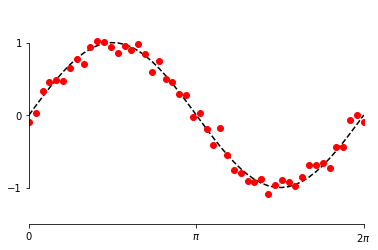

In [12]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt;

{{figures.add('batman', 'The Batman Curve')}}

The result of that complicated equation isn't actually that complicated.  

## Complex

Complex systems are different.  Whilst there are formal definitions of complexity{{footnotes.ref('complexity')}} there are
complex systems all around us.  Complex systems are sometimes hard to understand.  The components interact in strange
unpredictable ways, they're difficult or impossible to forecast even though they're easy to describe.

The classic example of a complex system is weather.  Whilst it is easy to describe the state of the weather at any one time,
forecasting the weather is a notoriously difficult problem.  Indeed, even with almost unlimited computing power, any forecast
beyond 10 days is little better than using the historical average of temperature and precipitation.  Butterflies flapping their
tiny hurricane-causing wings is a tired old cliché but does try to encapsulate a sensitivity of the weather to initial
conditions.  Another way of thinking about this sensitivity is as a lack of long term memory.{{footnotes.ref('chaos')}}



So let's compare our complicated equation above to this simple equation

\begin{equation}
z_{n+1} = z^{2}_{n} + c
\end{equation}

How does this equation work?  The numbers $z$ and $c$ are complex{{footnotes.ref('complexnum')}} and they define a
plane.  For each value of $c$ (basically an $x,y$ pair) we start with $z_0=0 + i0$ and the next value $z_1$ is found from the equation.  For the first iteration, it is obviously $c$.  Now we use the equation again to get $z_2 = c^2 + c$.  As we keep going, there are two things that can happen to $z$

-   $z$ can end up going to infinity.
-   $z$ remains bounded.

So we can classify each $c$ as either one which leads to an infinite $z$ or one which leads to a bounded $z$.  This should be pretty simple right?  If $c$ is a normal positive *real* number then this classification is very simple.  If $c$ > 0.25 or $c$ < -2.0
then the equation is unbounded.  If $c$ is between -2 and 0.25 then it's bounded.  Simple...

But, when we make the imaginary part of the number non zero, something very complex indeed happens.{{footnotes.ref('zoom')}}

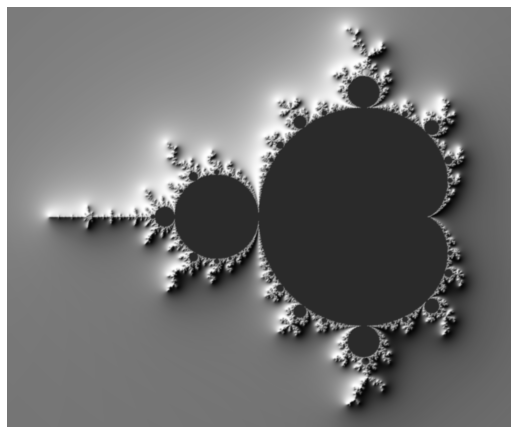

In [20]:
"""
===================================
Shaded & power normalized rendering
===================================

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.
"""
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


from matplotlib import colors


xmin, xmax, xn = -2.25, +0.75, 1500
ymin, ymax, yn = -1.25, +1.25, 1250
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon))/np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

# Normalized recount as explained in:
# https://linas.org/art-gallery/escape/smooth.html
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

# This line will generate warnings for null values but it is faster to
# process them afterwards using the nan_to_num
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 -
                      np.log(np.log(abs(Z)))/np.log(2) +
                      log_horizon)

dpi = 72
width = 7
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.gray, vert_exag=20.0,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

{{figures.add('hello', 'The hello')}}

{{figures.add('mandelbrot', 'The Mandelbrot Set')}}
This sort of emergent complexity arising from relatively simple rules has been an area of active research for 
more than 30 years and not only generates some beautiful pictures but also has provided some deep insight into dynamical
systems.

## What's this got to do with finance?

We've produced some pretty graphs{{footnotes.ref('batman')}} but what, if anything, has this to do with Systematic Trading,
finance or algorithms?

Very often when investors, commentators and practitioners are thinking about or discussing systematic trading
the two concepts of being complicated or being complex are used interchangeably and incorrectly.

#### Some things in finance are complicated
Systematic trading is very complicated.  Or, at least, it **should** be very complicated.    Writing computer code libraries,
combining them into systems and then connecting these systems both to themselves and to market venues thousands of
miles away is a very complicated task.  This is not an endeavour where an Excel spreadsheet and a couple of VBA
macros is going to work very well.  Whilst a single model running on a single stock in a simple brokerage account
*may* be able to be work reliably with a simple system, it's rare that a simple model running on one asset really
is an investable proposition.

As the number of assets, the number of models and the number of funds increases, the system necessarily becomes more
complicated.  However, the individual components don't necessarily become more complicated.  They remain 
understandable and predictable.  Of course, there is always the chance that a bug is introduced into the
system or individual components can interact in counter-intuitive ways but careful and rigorous 
regression testing before adding a new component, vehicle, model or asset to the system can
deal with these problems before they create issues in a live running system.

There are other examples of complicated things in finance being considered.  Vanilla European options were considered complicated
and scary for many years.  Only the *cognoscenti* could trade them and anybody who understood what "the greeks" were was thought
of as a mega-brain geek.  There was nothing complex about options, they were just a little complicated.  Tranched credit products
are sometimes complicated.  

Investors, journalists and even some practitioners find these complicated systems daunting and worrying.  The term
"Black Box" is used in a very pejorative way.  Some worry that complicated systems which they don't understand
are causing market volatility{{footnotes.ref('neverup')}} in some complicated way which they can't really 
explain.  

It appears that there is something uniquely scary about things in finance where the "complicated" part
involves mathematics, statistics or computer code.  Many private or public equity transactions involve astonishingly
complicated legal documents.  It is likely that no one person understands all of the 
documentation {{footnotes.ref('barely')}} but for some reason this causes less consternation and fear than a 
few lines of mathematics which a mathematically competent 14 year old could understand.

#### Some things in finance are complex

In contrast to complicated things, complex things are very hard (and often impossible) to forecast.  First and foremost of the complex things
in finance is "the market".  We aren't talking about any specific market like the NYSE or the CME Eurodollar market.  We're talking
about an idealised market which could just as easily refer to high frequency trading in IBM on the NASDAQ to an open outcry
market in 17th century Amsterdam.  What characteristics do these idealised markets have?

-   Multiple participants both on the buy and sell side
-   Participants are generally heterogeneous.  Some may be market makers, some may be hedgers, some may be speculators
-   Each participant has a goal which is generally known only to them
-   Some proportion of the market participants are "uninformed" or "noise traders"
-   A single security is (generally) traded in a single location
-   Arbitrage{{footnotes.ref('arbitrage')}} opportunities between identical securities are "rapidly" arbitraged away.

These rather simple characteristics generate extremely complex behaviour.  To a very good approximation for the
vast majority of participants in the market, it is impossible to forecast the market dynamics over a few seconds,
minutes, hours or days.

To give an indication of why it's unlikely that anybody can forecast a market in the short term, let's assume that
a participant in the market can forecast just the direction of the market move tomorrow.  All this person knows
is whether or not the market will go up or down tomorrow.  She doesn't know how much the move is, she just knows the direction
of the move in the SP500 tomorrow. If the prediction is up, she buys the SP500 on the close of the previous day, holds for one
day and then changes
her position at the end of the following day on the basis of whether or not the market will go up or down on the following day.

If our super trader starts with \\$1 on the 1st of January 2000 then by the end of 2018 our trader has something slightly
over \\${{'{:,.0f}'.format(super_trader_wealth)}} and will have had a Sharpe ratio of {{'{:,.0f}'.format(super_trader_sharpe)}}.
The trader's wealth of {{'{:,.0f} petadollars'.format(super_trader_wealth/1E15)}} is approximately
200 times the total global wealth{{footnotes.ref('totalwealth')}} in the world.  Since very few, if any, people have 18 year track records this good{{footnotes.ref('problems')}}, we can conclude
that even forecasting up or down is really really difficult.

This is a direct result of the complexity of market dynamics.  Complex systems are difficult to forecast due to their
extreme dependence on initial conditions and non-linear relationships between the components.

So is any trading or financial process doomed to failure?  Does complexity ensure that the efficient market hypothesis is
true?  Slightly surprisingly, the answer to this is no.

## Complexity requires complicated processes

For our final example, let's assume that we have a very poor quality forecast of whether or not a security will 
rise or fall over a year.  The probability that this forecast is right is 51%.  Making some simple assumptions{{footnotes.ref('assumptions')}} about the nature of the security, our forecast would enable us to make about 0.25% 
annually.  At its heart, this poor performance is a 
direct result of the near complete randomness of markets which is a direct result of the highly complex nature of 
markets in general.  Obviously, the process to actually trade this single forecast isn't very complicated.  The "system"
makes the forecast on the 1st of January (up/down) and on the basis of this, you buy or sell.  Then ignore the market,
take the position off on the 31st of December and see what your profit or loss is.

Even the most ardent advocate of high quality systems and software in the financial world would agree that there
is little need for complicated systems to trade this forecast.

However, for our forecasting technique to be useful, it will have to generate higher returns than half a percent a year.  An
obvious way to do this is to apply the same forecasting technique to other assets.  If we can make forecasts on 
5000 uncorrelated stocks (this is a big if) then our return rises to 17% with the same level of risk.

Leaving aside how likely it is that you can make 5000 uncorrelated forecasts, making use of very imperfect forecasting
techniques on many securities theoretically looks like a good idea.  Indeed, this is often referred to as the *Fundamental
Law Of Active Management*.  If you have a certain degree of "skill" then you should apply that skill to as many things
as possible.

The problem of managing one position is a lot easier than the problem of managing 5000.  Firstly, of course, one
has to collect all the data for each of the 5000 securities.  Then one has to make the forecast on these 5000
securities.  Then a decision has to be made about how much risk (or assets) should be assigned to each
of the securities.  This could be as simple as 1/5000 or could be a complicated optimisation procedure with multiple 
constraints and which will require a forecast covariance matrix.  
Then the resulting portfolio needs to be analysed to understand its risk characteristics and
exposures to various risk factors (which themselves have to be defined and analysed).  Once the 5000 trades have
been done, things get a little less complicated although it is highly likely that there will be thousands
of corporate actions like dividend payments, stock splits, bankruptcies and mergers to handle over the course
of the year.  If the securities are not all denominated in the domestic currency then currency hedges and
rebalances will have to be done.  Finally, on the 31st of December, all the trades and currency hedges 
will have to be unwound.

This whole process is complicated.  So complicated that it requires a significant amount of "specialist" 
mathematical, statistical and financial quantitative knowledge.  If the investment process is going to be
robust then it also requires a significant amount of immensely complicated software and arrays of 
computers and storage to analyse, manage and retain all the information.  This may run to millions
of lines of code.  Writing, testing, managing and deploying these millions of lines of code is also a
complicated process requiring specialist knowledge and experience.  At Cantab we are
very keen to explain what we do and how we do it to our investors ("a glass box not a black box") but
necessarily, these explanations have to elide over some of the critical and complicated details.

So why do we need all these complicated (and hard to explain) techniques and processes?  We need complicated processes
precisely because the markets and the securities which we trade are complex.  They are difficult to forecast and
difficult to understand in detail.  The markets, the securities and the people who trade in these markets interact
in complex non-linear ways.  There is the impact of unexpected news events arriving at random times which
can have unpredictable (literally) effects on the prices of securities.  All this complexity needs to be "factored out"
from the securities to (hopefully) generate a reasonable forecast of how the security will behave over the next
minute or the next year.  

It is complicated and there is no simple way to explain it.


## Conclusion

Investors often describe systematic investment processes as "complex" and worry that they can't understand "the complexity".  This
is a category error.  Markets are complex.  Investors suffer from exposure to complexity in both systematic and discretionary
investments.  

However, if investors describe systematic investment processes as complicated then they are correct and something which is
complicated should not be something to fear.  Investors should initially ignore how complicated the investment process is
and concentrate on what the output of the process is.  Investors should also accept that at some level they
will never understand a complicated systematic investment process.  Not because they specifically aren't capable of that (many
of our investors are very smart indeed) but because it's unlikely that *any* one person can understand it all.  Whilst
each individual component is fully explicable and systematic, the ability to understand every single part of 
a systematic investment process is probably beyond any one person.

Conversely, the press and broadcast media are full of glib simple explanations of
the dynamics of highly complex markets.  Investors would find it instructive to worry more about overly simple
descriptions of unfathomable complexity than about investment processes which are complicated.

#### Footnotes
{{footnotes.output()}}